# Spectral Differencing and Applications

Spectral error:  0.0007812499461110349
Finite Diff. error:  0.011923342038318064


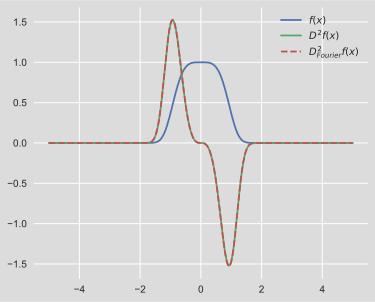

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'axes.facecolor':'#DCDCDC' ,'figure.facecolor':'#DCDCDC'})

plt.figure(figsize=(6, 5))
pi=np.pi
N=2**8
L=10
x=np.linspace(-L/2,L/2,N)

#####Three ways to write the frequencies:
########## -1-
# M = [n for n in range(0,N//2)] + [0]+[n for n in range(-(N//2-1),0)]
# k = 2*pi*np.array(M)/L;
########## -2-
# k = np.linspace(-1,1,len(x))*pi*N/L
# k = np.fft.fftshift(k)
########## -3-
k = np.fft.fftfreq(N, L/(2*pi*N))


### Make sure f is periodic!
f=np.exp(-x**4)
df=-4*x**3*f


fdf=np.fft.ifft(1j*k*np.fft.fft(f));      fdf=np.real(fdf)

plt.plot(x,f,x,df)
plt.plot(x,fdf,'--')
plt.legend(labels=("$f(x)$","$D^2f(x)$","$D^2_{Fourier}f(x)$"));
print('Spectral error: ',sum(np.abs(df-fdf)/N))
print('Finite Diff. error: ',sum(np.abs(df-np.append(np.diff(f)/(L/N),[0]))/N))

### How about a second order derivative?

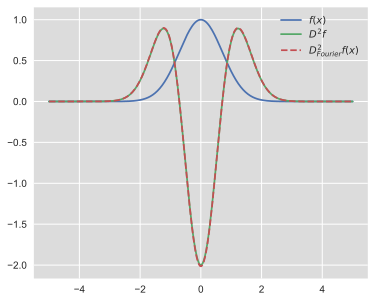

In [2]:
plt.figure(figsize=(6, 5))
f=np.exp(-x**2)
df=(-2*x)*f
ddf=(4*x**2-2)*f
fddf=np.fft.ifft((1j*k)**2*np.fft.fft(f));      fddf=np.real(fddf)



plt.plot(x,f,x,ddf)
plt.plot(x,fddf,'--');
plt.legend(labels=("$f(x)$","$D^2f$","$D^2_{Fourier}f(x)$"));

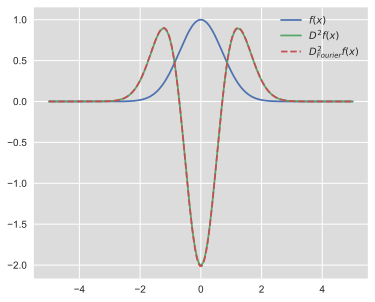

In [3]:
plt.figure(figsize=(6, 5))
### the function scipy.fftpack.diff() does exactly the spectral differenciation above:
from scipy import fftpack
fddf=fftpack.diff(f, order=2,period=L)


plt.plot(x,f,x,ddf)
plt.plot(x,fddf,'--');
plt.legend(labels=("$f(x)$","$D^2f(x)$","$D^2_{Fourier}f(x)$"));

### Moreover with scipy fftpack  we can easily integrate! 
otherwise we would need to account for zero denominators if done by hand ($\frac{1}{i k} $ for first order integration); scipy deals with it automatically as $\frac{1}{i k + \epsilon}$. 

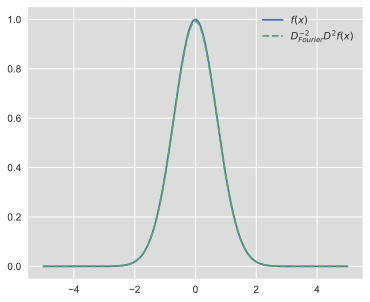

In [4]:
plt.figure(figsize=(6, 5))
from scipy import fftpack
f=np.exp(-x**2)
ddf=(4*x**2-2)*f
IIddf=fftpack.diff(ddf, order=-2,period=L) ### up to a constant!!
IIddf+=abs(IIddf[0])


plt.plot(x,f)
plt.plot(x,IIddf,'--');
plt.legend(labels=("$f(x)$","$D^{-2}_{Fourier}D^2f(x)$"));

### How about a non integer derivative?

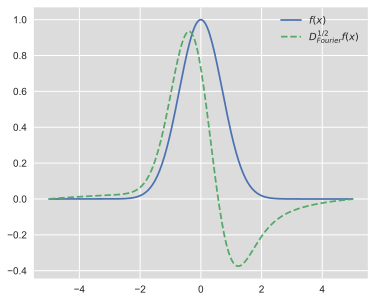

In [5]:
plt.figure(figsize=(6, 5))
# f=np.exp(-x**2)
nid_f=np.fft.ifft((1j*k)**(0.5)*np.fft.fft(f))
nid_f+=abs(nid_f[0]) ### up to a constant!!
plt.plot(x,f)
plt.plot(x,np.real(nid_f),'--');
plt.legend(labels=("$f(x)$","$D^{1/2}_{Fourier}f(x)$"));

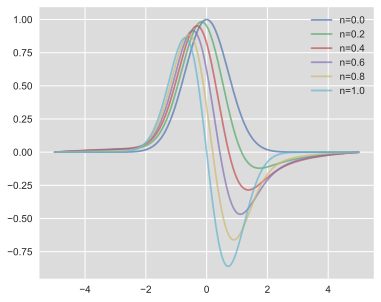

In [6]:
plt.figure(figsize=(6, 5))
# f=np.exp(-x**2)
for n in range(0,11,2):
    nid_f=np.fft.ifft((1j*k)**(n/10)*np.fft.fft(f))
    nid_f+=abs(nid_f[0])### up to a constant!!
    plt.plot(x,np.real(nid_f),alpha=0.7,label="n="+str(n/10))
    plt.legend()
    

In [7]:
# from ipywidgets import interactive
# pi=np.pi;N=2**8;L=10
# D = np.empty((200, N))
# plt.figure(figsize=(8, 6))
# x=np.linspace(-L/2,L/2,N)
# k = np.fft.fftfreq(N, L/(2*pi*N))
# f=np.exp(-x**2)
# for n in range(0,200):
#     nid_f=np.fft.ifft((1j*k)**(n/100)*np.fft.fft(f))
#     nid_f+=abs(nid_f[0])### up to a constant!!
#     D[n,:]=nid_f
    
# def f(n):
#     plt.figure(3)
#     plt.plot(D[n,:])
#     plt.ylim(-1, 1)
#     plt.show()

# interactive_plot = interactive(f, n=(0, 200))
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot

### Solve an ODE?

#### Example1

Consider now the following ODE:

$$ \frac{du(t)}{dt} = -g u(t) +q(t),$$
where
$$q(t)=\frac{At}{\tau}e^{1-t/\tau}.$$
The boundary conditions are periodic: $u(t)=u(t+L)$.
Thus, we can solve the ODE spectrally through ffts, which naturally incorporate this condition. 

The ODE above can be rewritten as:
$$\Bigl(\frac{d}{dt}+g\Bigr)u(t)=q(t)$$
so that
$$u(t)=\Bigl(\frac{d}{dt}+g\Bigr)^{-1}q(t)$$



The analytical solution can be found to be
$$u_{An}(t)=A e^{-g t -\frac{L}{\tau}-\frac{t}{\tau}+1}\frac{ \tau  e^{g L +\frac{L}{\tau}+\frac{t}{\tau}}+(-g \tau  t+t+\tau ) e^{g t+\frac{L}{\tau }}+(L (g \tau -1)-\tau ) e^{g L+\frac{t}{\tau }}+(t (g \tau -1)-\tau ) e^{g (L+t)+\frac{L}{\tau }}}{\left(e^{g L}-1\right) (g \tau -1)^2}.$$
Choosing parameters $(A,\tau,g)=(1,1/2,2)$, this can be written as:
$$u_{An}(t)=\frac{e^{1-2 t} \left(L^2+e^{2 L} t^2-t^2\right)}{e^{2 L}-1}.$$

/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


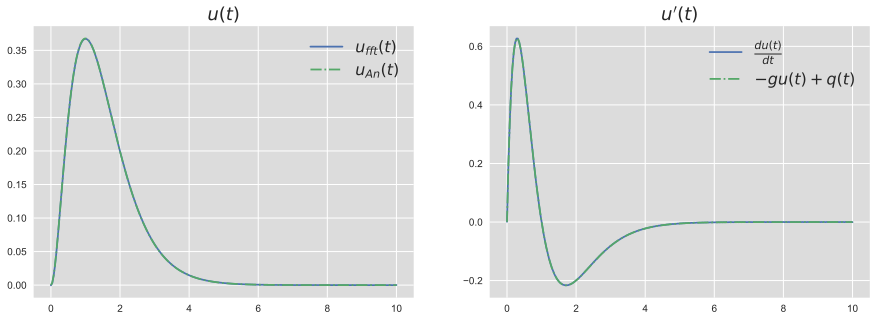

In [8]:
N = 2**8;L=10;
t = np.linspace(0,L,N)
A = 1; tau = 0.5; g = 2; 
q = lambda t: A * t * np.exp(1 - t / tau)/ tau 


k = np.fft.fftfreq(N, L/(2*pi*N))
u = np.fft.ifft(1/(g + 1j*k) * np.fft.fft(q(t)))


plt.figure(figsize=(15, 5));
####plot1 of u
plt.subplot('121'); plt.title('$u(t)$',fontsize=18)
plt.plot(t, u);
plt.plot(t, (np.exp(1-2*t)*(L**2+np.exp(2*L)*t**2-t**2))/(np.exp(2*L)-1) ,'-.');
plt.legend(['$u_{fft}(t)$','$u_{An}(t)$'],fontsize=16)
####plot2 of u'
plt.subplot('122'); plt.title(r"$u'(t)$",fontsize=18)
plt.plot(t, fftpack.diff(u,period=L));
plt.plot(t, (-g*u + q(t)) ,'-.');
plt.legend([r'$\frac{d u(t)}{dt}$',r'$-gu(t)+q(t)$'],fontsize=16);

#### Example2

Consider now the ODE
$$u''+c u=x^\nu$$
with $u(x+L)=u(x)$ and $u'(x+L)=u'(x)$.The ODE can be rewritten as:
$$(\partial_x^2+c)u(x)=x^\nu,$$
so that the solution can formally be written as:
$$u(x)=(\partial_x^2+c)^{-1}x^\nu$$

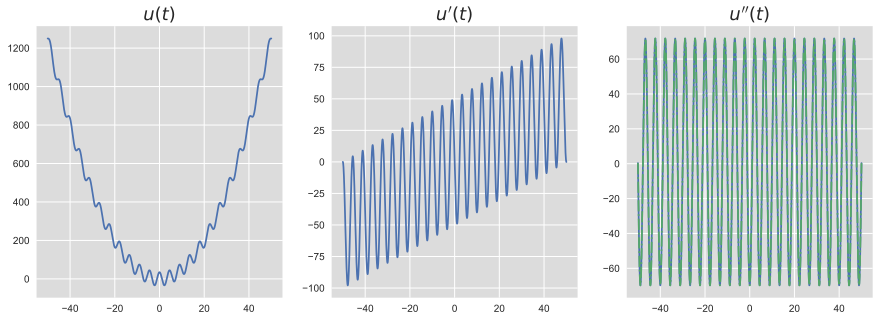

In [9]:
from scipy import fftpack
N=2**11;L=100;
c=2;nu=2;
x=np.linspace(-L/2,L/2,N)

k = np.fft.fftfreq(N, L/(2*pi*N))
u = np.fft.ifft(1/((1j*k)**2+ c) * np.fft.fft(x**nu))

plt.figure(figsize=(15, 5));
plt.subplot('131'); plt.title("$u(t)$",fontsize=18)
plt.plot(x,u);
plt.subplot('132'); plt.title("$u'(t)$",fontsize=18)
plt.plot(x,fftpack.diff(u,period=L));
plt.subplot('133'); plt.title("$u''(t)$",fontsize=18)
plt.plot(x,fftpack.diff(u,order=2,period=L));
plt.plot(x,x**nu-c*u,'-.');

Notice that, although the solutions to some ODEs could be easily computed exactly through packages such as Mathematica's DSolve, the solution is very cumbersome. In the particular case above, Mathematica's DSolve finds the solution for $\nu=2$
$$u(x)=\frac{\sqrt{c} L \csc \left(\frac{\sqrt{c} L}{2}\right) \cos \left(\sqrt{c} x\right)+c x^2-2}{c^2} ,$$
while the general solution for arbitrary $\nu$, $c$, and $L$ is:
$$u(x)= \frac{1}{4} c^{-\nu -\frac{3}{2}} \Biggl[c^{\nu +1} L \left(c L^2\right)^{-\nu } \left(\cos \left(\frac{1}{2} \sqrt{c} (L-2 x)\right) (-L)^{\nu }+L^{\nu } \cos \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)\right) \csc \left(\frac{\sqrt{c} L}{2}\right) \Gamma \left(\nu +1,\frac{1}{2} i \sqrt{c} L\right) \left(-i \sqrt{c} L\right)^{\nu -1}+2^{-\nu } c^{\nu +\frac{1}{2}} e^{-\frac{1}{2} i \sqrt{c} L} \left(1+e^{i \sqrt{c} L}\right) \left((-L)^{\nu }+L^{\nu }\right) \cos \left(\sqrt{c} x\right)+c^{\nu +1} L \left(i \sqrt{c} L\right)^{\nu -1} \left(c L^2\right)^{-\nu } \left(\cos \left(\frac{1}{2} \sqrt{c} (L-2 x)\right) (-L)^{\nu }+L^{\nu } \cos \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)\right) \csc \left(\frac{\sqrt{c} L}{2}\right) \Gamma \left(\nu +1,-\frac{1}{2} i \sqrt{c} L\right)-2 c^{\nu } x^{\nu -1} \left(i \sqrt{c} x\right)^{\nu +1} \left(c x^2\right)^{-\nu } \Gamma \left(\nu +1,-i \sqrt{c} x\right) \sin \left(\sqrt{c} x\right)+2 c^{\nu +\frac{1}{2}} i x^{\nu } \left(-i \sqrt{c} x\right)^{\nu } \left(c x^2\right)^{-\nu } \Gamma \left(\nu +1,i \sqrt{c} x\right) \sin \left(\sqrt{c} x\right)+\frac{2^{-\nu } e^{-\frac{1}{2} i \sqrt{c} L} \left(c L^2\right)^{-\nu } \left| L\right| ^{-2 \nu } \left(i+\cot \left(\frac{\sqrt{c} L}{2}\right)\right) \left(2^{\nu } \left(i \sqrt{c} L\right)^{2 \nu } \Gamma \left(\nu +1,-\frac{1}{2} i \sqrt{c} L\right) \left(2 \left((-L)^{\nu }+L^{\nu }\right) \nu  \cos \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)+2 \left((-L)^{\nu }+L^{\nu }\right) \nu  \cos \left(\frac{1}{2} \sqrt{c} (L-2 x)\right)-\sqrt{c} L \left(\sin \left(\frac{1}{2} \sqrt{c} (L-2 x)\right) (-L)^{\nu }+L^{\nu } \sin \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)\right)\right) \left(-i \sqrt{c} L\right)^{\nu }+2^{\nu } \left(i \sqrt{c} L\right)^{\nu } \Gamma \left(\nu +1,\frac{1}{2} i \sqrt{c} L\right) \left(2 \left((-L)^{\nu }+L^{\nu }\right) \nu  \cos \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)+2 \left((-L)^{\nu }+L^{\nu }\right) \nu  \cos \left(\frac{1}{2} \sqrt{c} (L-2 x)\right)-\sqrt{c} L \left(\sin \left(\frac{1}{2} \sqrt{c} (L-2 x)\right) (-L)^{\nu }+L^{\nu } \sin \left(\frac{1}{2} \sqrt{c} (L+2 x)\right)\right)\right) \left(-i \sqrt{c} L\right)^{2 \nu }+L \left(c L^2\right)^{2 \nu } \left((-L)^{\nu }+L^{\nu }\right) \cos \left(\sqrt{c} x\right) \sin \left(\sqrt{c} L\right) \left(-\sqrt{c}\right)\right)}{L}+2 x^{\nu } \left| x\right| ^{-2 \nu } \cos \left(\sqrt{c} x\right) \left(\Gamma \left(\nu +1,i \sqrt{c} x\right) \left(-i \sqrt{c} x\right)^{\nu }+\left(i \sqrt{c} x\right)^{\nu } \Gamma \left(\nu +1,-i \sqrt{c} x\right)\right) \sqrt{c}+4 \nu  \left| L\right| ^{-2 \nu -1} \cos \left(\sqrt{c} x\right) \cot \left(\frac{\sqrt{c} L}{2}\right) \left(\Gamma \left(\nu +1,\frac{1}{2} i \sqrt{c} L\right) \left(-i \sqrt{c} L\right)^{\nu }+\left(i \sqrt{c} L\right)^{\nu } \Gamma \left(\nu +1,-\frac{1}{2} i \sqrt{c} L\right)\right) \left((-L)^{\nu } \text{Abs}'\left(-\frac{L}{2}\right)-L^{\nu } \text{Abs}'\left(\frac{L}{2}\right)\right)\Biggr] .$$




### More...

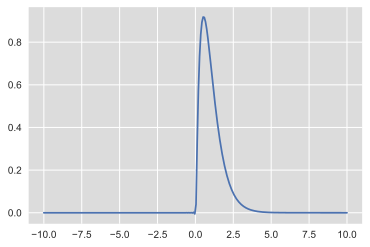

In [10]:
N=2**8;L=20
x=np.linspace(-L/2,L/2,N)
k = np.fft.fftfreq(N, L/(1*pi*N))
########################################
y=np.fft.ifft(1/((1j*k+1)**2+ 0),norm='ortho') ### exp(-k) √(2Pi)k HeavisideTheta[k]
y=np.fft.fftshift(y)
y=np.real(y)
plt.plot(x,y);

### Finally a PDE:

Consider the variable coefficient wave equation
$$u_t+c(x)u_x=0,$$
where
$$c(x)=\frac{1}{5}+\sin^2(x-1).$$
We will consider $x \in [0,2\pi]$, $t>0$, with periodic boundary conditions.

Numerically we solve spectrally in space, and we treat time thorugh a leap frig formula. This gives
$$\frac{u^{(n+1)}_j-u^{(n-1)}_j}{2\Delta t}=-c(x_j)(\partial_x u^{(n)})_j,\quad j=1,\dots,N;$$

i.e.

$$u^{(n+1)}_j=u^{(n-1)}_j-2\Delta t c(x_j)(\partial_x u^{(n)})_j,\quad j=1,\dots,N;$$

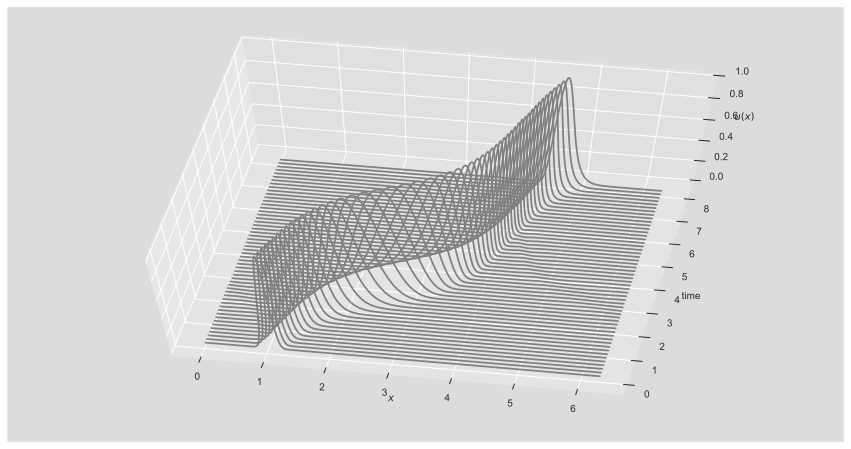

In [2]:
from mpl_toolkits.mplot3d import Axes3D
N=2**9;L=2*pi;
x=np.linspace(0,L,N)
y=np.ones(len(x))
k = np.fft.fftfreq(N, L/(2*pi*N))
dt=(x[1]-x[0])/4;t=dt
#####Initial value for u
c = 1/5+np.sin(x-1)**2
u=np.exp(-100*(x-1)**2)
u_old=np.exp(-100*(x-1-0.2*dt)**2)


fig = plt.figure(figsize=(15, 8));
ax = fig.add_subplot(111, projection='3d')
U=u
for n in range(53): #when to plot
    for m in range(50): #time
        t += dt
        du=np.fft.ifft((1j*k)*np.fft.fft(u))
        u_new = u_old-2*dt*c*du
        u_old = u; u = np.real(u_new)
        if not n//1==0:  U = np.c_[U, u]
    plt.plot(x,t*y,u,'gray');
# ax.azim, ax.elev = -98,55
ax.view_init(65, 280)
ax.set_xlabel('$x$',fontsize=10)
ax.set_ylabel('time',fontsize=10)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('$u(x)$',fontsize=10,rotation=0);

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go
Z=U.T
layout = go.Layout(
    hovermode=False,
    width=800,
    height=700,
    autosize=True,
#     title='Variable coefficient wave equation',
    scene=dict(
        xaxis=dict(
            title='x',
            gridcolor='white',
            zerolinecolor='white',
            showbackground=True,
            backgroundcolor='rgba(0, 0, 0, 0)',
            showspikes=False,
            range=[0.7, 5],
        ),
        yaxis=dict(
            title='time',
            gridcolor='white',
            zerolinecolor='white',
            showbackground=True,
            backgroundcolor='rgba(0, 0, 0, 0)',
            showspikes=False,
        ),
        zaxis=dict(
            title='u(x)',
            gridcolor='white',
            zerolinecolor='white',
            showbackground=True,
            backgroundcolor='rgba(0,0,0,0)',
            spikesides=True,showline=True,showgrid=True,
            showspikes=False,          
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-0.25,
                y=-1.5,
                z=0.8100,
            )
        ),
#         bgcolor="rgba(0, 0, 0, 0)",
        aspectratio = dict( x=1, y=1, z=0.4 ),
        aspectmode = 'manual',
    )
)

n=5
fig = go.Figure(data=[go.Surface(x=x,y=np.linspace(0,t*n,U.shape[1]),z=Z[1::n],colorscale="Viridis",showscale = False)], layout=layout,)
fig["layout"].update({
#                     "plot_bgcolor":"rgba(0, 0, 0, 0)", 
                    "paper_bgcolor":"rgba(0,0,0,0)"
                     })
py.iplot(fig, filename='var-coeff-wave-eq')

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan
(see: https://plot.ly/products/cloud ).

In [ ]:
# X = x
# Y = np.linspace(0,t,U.shape[1])
# X, Y = np.meshgrid(X, Y)
# Z=U.T
# X=X[1::100];Y=Y[1::100]
# Z=Z[1::100]
# fig = plt.figure(figsize=(15, 10));
# ax = plt.axes(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0);
# ax.azim, ax.elev = -90,50